In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

In [41]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
    
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, stride=2, padding=1),  
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU()
        )
        -
    
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  
        )

    def forward(self, x):
        encoded = self.encoder(x)
        classifier = self.
        decoded = self.decoder(encoded)
        return decoded

In [42]:
transform = transforms.Compose([
    transforms.Resize((128, 128)), 
    transforms.ToTensor(),         
])

dataset = datasets.ImageFolder(root='/kaggle/input/birds-dataset-endterm', transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)




train_dataset = datasets.ImageFolder(root='/kaggle/input/birds-dataset-endterm/train', transform=transform)
test_dataset = datasets.ImageFolder(root='/kaggle/input/birds-dataset-endterm/test', transform=transform)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)  


In [43]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Autoencoder().to(device)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
train_loss_history = []
test_loss_history = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        
        output = model(data)
        loss = criterion(output, data)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.to(device)
            output = model(data)
            loss = criterion(output, data)
            test_loss += loss.item()
    
    avg_test_loss = test_loss / len(test_loader)
    test_loss_history.append(avg_test_loss)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Loss: {avg_train_loss:.4f}, '
          f'Test Loss: {avg_test_loss:.4f}')



Epoch [1/20], Train Loss: 0.0026, Test Loss: 0.0131
Epoch [2/20], Train Loss: 0.0026, Test Loss: 0.0108
Epoch [3/20], Train Loss: 0.0026, Test Loss: 0.0090
Epoch [4/20], Train Loss: 0.0026, Test Loss: 0.0064
Epoch [5/20], Train Loss: 0.0026, Test Loss: 0.0056
Epoch [6/20], Train Loss: 0.0026, Test Loss: 0.0051
Epoch [7/20], Train Loss: 0.0026, Test Loss: 0.0048
Epoch [8/20], Train Loss: 0.0026, Test Loss: 0.0046
Epoch [9/20], Train Loss: 0.0026, Test Loss: 0.0044
Epoch [10/20], Train Loss: 0.0026, Test Loss: 0.0042
Epoch [11/20], Train Loss: 0.0026, Test Loss: 0.0044
Epoch [12/20], Train Loss: 0.0026, Test Loss: 0.0038
Epoch [13/20], Train Loss: 0.0026, Test Loss: 0.0035
Epoch [14/20], Train Loss: 0.0026, Test Loss: 0.0032
Epoch [15/20], Train Loss: 0.0026, Test Loss: 0.0029
Epoch [16/20], Train Loss: 0.0026, Test Loss: 0.0028
Epoch [17/20], Train Loss: 0.0026, Test Loss: 0.0029
Epoch [18/20], Train Loss: 0.0026, Test Loss: 0.0026
Epoch [19/20], Train Loss: 0.0026, Test Loss: 0.0024
Ep

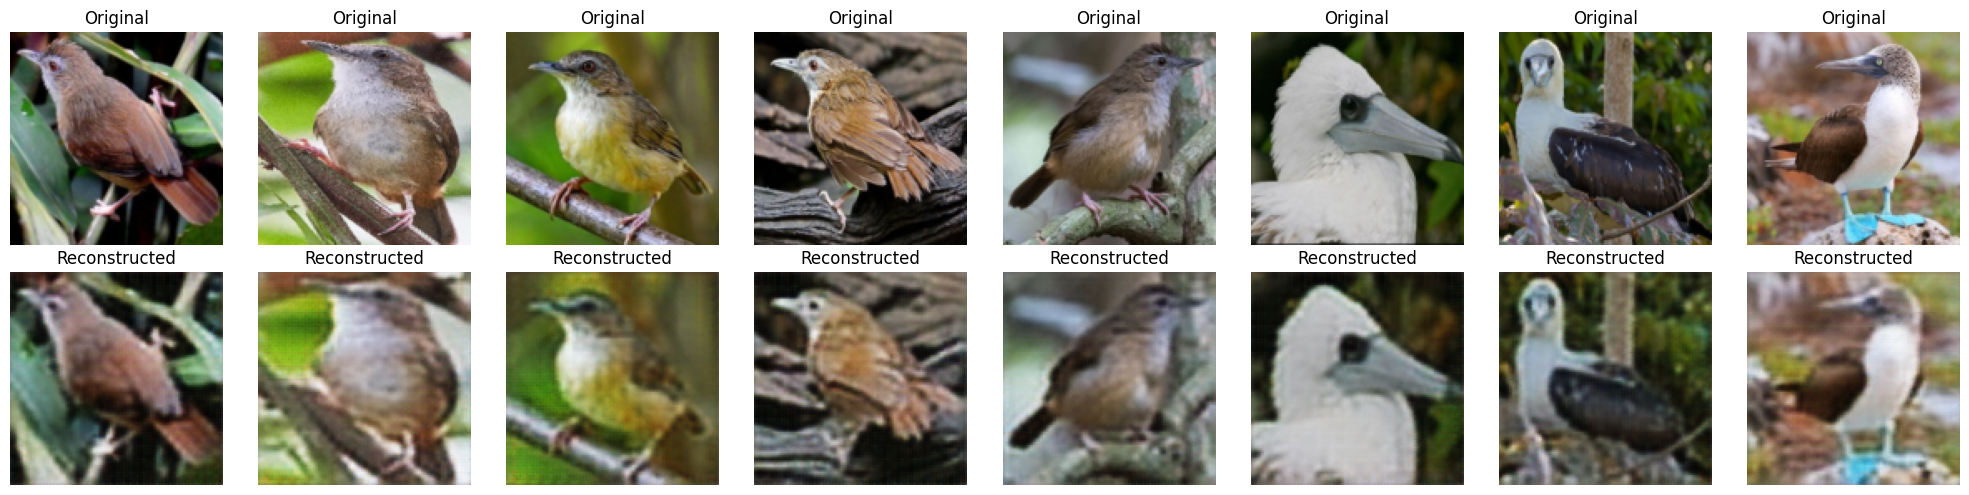

In [44]:
dataiter = iter(test_loader)
images, _ = next(dataiter)
images = images.to(device)

with torch.no_grad():
    outputs = model(images[:8])  

images = images.cpu()
outputs = outputs.cpu()

fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(20, 5))
for idx in range(8):
    axes[0, idx].imshow(np.transpose(images[idx].numpy(), (1, 2, 0)))
    axes[0, idx].set_title("Original")
    axes[0, idx].axis('off')
    
    axes[1, idx].imshow(np.transpose(outputs[idx].numpy(), (1, 2, 0)))
    axes[1, idx].set_title("Reconstructed")
    axes[1, idx].axis('off')

plt.tight_layout()
plt.show()

In [45]:
test_iter = iter(test_loader)
images, labels = next(test_iter)         

sample_image = images[0]         


print(sample_image[0, :5, :5])  

tensor([[0.1294, 0.1176, 0.1333, 0.1569, 0.1961],
        [0.1490, 0.1333, 0.1294, 0.1412, 0.1843],
        [0.1490, 0.1294, 0.1216, 0.1333, 0.1529],
        [0.1255, 0.1176, 0.1059, 0.1098, 0.1137],
        [0.0941, 0.0863, 0.0824, 0.0863, 0.0863]])


In [49]:
test_iter1 = iter(test_loader)
images, label = next(test_iter1)

sample_image = images[2]

print(sample_image[0, :1, :8])

tensor([[0.2863, 0.2902, 0.2941, 0.2980, 0.2980, 0.2902, 0.2902, 0.2824]])
